# Potato Chips Sales Analysis

You are part of Quantium’s retail analytics team and have been approached by your client, the Category Manager for Chips, who wants to better understand the types of customers who purchase Chips and their purchasing behaviour within the region.

The insights from your analysis will feed into the supermarket’s strategic plan for the chip category in the next half year.

We need to present a strategic recommendation to Julia that is supported by data which she can then use for the upcoming category review. However, to do so, we need to analyse the data to understand the current purchasing trends and behaviours. The client is particularly interested in customer segments and their chip purchasing behaviour. Consider what metrics would help describe the customers’ purchasing behaviour.

In your analysis make sure you define the metrics – look at total sales, drivers of sales, where the highest sales are coming from etc. Explore the data, create charts and graphs as well as noting any interesting trends and/or insights you find. These will all form part of our report to Julia. 

LIFESTAGE: Customer attribute that identifies whether a customer has a family or not and what point in life they are at e.g. are their children in pre-school/primary/secondary school.

PREMIUM_CUSTOMER: Customer segmentation used to differentiate shoppers by the price point of products they buy and the types of products they buy. It is used to identify whether customers may spend more for quality or brand or whether they will purchase the cheapest options.

Start by importing all the necessary libraries and reading in the provided data

We were provided with 2 data frames to solve this problem and analyse. A purchase behaviour data frame and a transaction data data frame. I would do alittle analysis on both before i merge them and do the proper analysis.


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style('whitegrid')

In [2]:
purchase = pd.read_csv('QVI_purchase_behaviour.csv')

In [3]:
purchase

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream
...,...,...,...
72632,2370651,MIDAGE SINGLES/COUPLES,Mainstream
72633,2370701,YOUNG FAMILIES,Mainstream
72634,2370751,YOUNG FAMILIES,Premium
72635,2370961,OLDER FAMILIES,Budget


From my understanding, the data above shows each individual customer, with their unique card number that we can use to track their purchases. The customers have also already been places in LIFESTAGE, which has to do with their age and marital status. They have also been placed under PREMIUM CUSTOMER to identify the quality of previous purchses i suppose

In [4]:
transaction = pd.read_excel('QVI_transaction_data.xlsx')

In [5]:
transaction

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8
...,...,...,...,...,...,...,...,...
264831,43533,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8
264832,43325,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4
264833,43410,272,272379,270187,51,Doritos Mexicana 170g,2,8.8
264834,43461,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8


The data set above shows the details of transaction by the above 72637 customers. Each transaction and been documented with details such as STORE NUMBER, CARD NUMBER, TRANSACTION ID, PRODUCT NUMBER, PRODUCT NAME, PRODUCT QUANTITY, TOTAL SALES(cost of everything for that partical transaction. To make it whole, i would merge the 2 data sets, to make it include LIFESTAGE and PREMIUM CUSTOMER

Checking for null values and the overall look of the data

In [6]:
purchase.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LYLTY_CARD_NBR    72637 non-null  int64 
 1   LIFESTAGE         72637 non-null  object
 2   PREMIUM_CUSTOMER  72637 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [8]:
purchase['LYLTY_CARD_NBR'].nunique()

72637

LYLTY_CARD_NBR seems to represent the card number of each customer, meaning there are 72637 customers and 264836 transactions made

Let's see what LIFESTAGE is broken down into

In [9]:
purchase['LIFESTAGE'].value_counts()

RETIREES                  14805
OLDER SINGLES/COUPLES     14609
YOUNG SINGLES/COUPLES     14441
OLDER FAMILIES             9780
YOUNG FAMILIES             9178
MIDAGE SINGLES/COUPLES     7275
NEW FAMILIES               2549
Name: LIFESTAGE, dtype: int64

Let's see what PREMIUM CUSTOMER is broken down into

In [10]:
purchase['PREMIUM_CUSTOMER'].value_counts()

Mainstream    29245
Budget        24470
Premium       18922
Name: PREMIUM_CUSTOMER, dtype: int64

In [11]:
transaction

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8
...,...,...,...,...,...,...,...,...
264831,43533,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8
264832,43325,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4
264833,43410,272,272379,270187,51,Doritos Mexicana 170g,2,8.8
264834,43461,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8


In [12]:
transaction['DATE'].nunique()

364

The date is in integer format and would be changed to date format later in the analysis

In [13]:
transaction['STORE_NBR'].nunique() #There are 272 stores in total

272

In [14]:
transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            264836 non-null  int64  
 1   STORE_NBR       264836 non-null  int64  
 2   LYLTY_CARD_NBR  264836 non-null  int64  
 3   TXN_ID          264836 non-null  int64  
 4   PROD_NBR        264836 non-null  int64  
 5   PROD_NAME       264836 non-null  object 
 6   PROD_QTY        264836 non-null  int64  
 7   TOT_SALES       264836 non-null  float64
dtypes: float64(1), int64(6), object(1)
memory usage: 16.2+ MB


No null values in the transaction data

In [15]:
transaction['STORE_NBR'].unique()

array([  1,   2,   4,   5,   7,   8,   9,  13,  19,  20,  22,  23,  25,
        33,  36,  38,  39,  41,  43,  45,  51,  54,  55,  56,  58,  59,
        60,  62,  63,  67,  71,  72,  74,  75,  80,  81,  82,  83,  84,
        88,  94,  96,  97, 101, 102, 104, 106, 109, 110, 111, 112, 114,
       115, 116, 118, 119, 120, 122, 125, 128, 129, 130, 133, 149, 151,
       152, 153, 156, 157, 160, 161, 164, 166, 167, 168, 169, 172, 173,
       175, 178, 181, 184, 186, 187, 191, 194, 196, 197, 200, 205, 207,
       208, 209, 212, 214, 215, 216, 217, 219, 222, 223, 225, 226, 227,
       235, 236, 237, 241, 243, 246, 247, 248, 250, 253, 255, 256, 257,
       262, 265, 266, 269, 271,  77,   3,   6,  10,  12,  15,  16,  17,
        18,  21,  24,  26,  27,  28,  29,  30,  32,  34,  35,  37,  40,
        46,  47,  48,  49,  50,  52,  53,  57,  61,  64,  65,  66,  68,
        69,  70,  73,  78,  79,  86,  87,  89,  90,  91,  93,  95,  98,
       100, 103, 105, 107, 108, 113, 117, 121, 123, 124, 126, 12

In [16]:
transaction['TXN_ID'].nunique() #There are 263127 transactions made

263127

In [17]:
transaction['TXN_ID'].value_counts()

108462    3
1162      3
211119    3
228741    3
222775    3
         ..
115864    1
115865    1
115866    1
115867    1
270189    1
Name: TXN_ID, Length: 263127, dtype: int64

In [18]:
transaction['PROD_NBR'].unique()

array([  5,  66,  61,  69, 108,  57,  16,  24,  42,  52, 114,  15,  92,
        44,  54,  94,  98,  93,  56,   7,  31,  32, 111,  46,  13,  99,
        26,  64,  22,  48,  37,  36,  51, 107, 106,   4, 113,  45,  39,
       102, 104,   3,  82,  88,  40,  73,  87,  84,  70,  89, 101,  63,
        25,  47,  71,  65,  33,  35,  12,   8,  75, 100,  29,  59,  30,
        81,  67, 110,  28,   2,  14,  77,  17,  83,  68,  96,  79,  23,
        50,  78,   1,  86,  53,  72,  74,  76,   9,  91, 105,  90, 109,
        27,  62, 112,  55,  18,  34,  49,  60,  38, 103,  85,  95,  97,
        20,  19,  21,   6,  80,  58,  10,  11,  43,  41], dtype=int64)

In [19]:
transaction['PROD_NBR'].nunique() #There are 114 different products being sold

114

In [20]:
transaction['PROD_NAME'].unique()

array(['Natural Chip        Compny SeaSalt175g',
       'CCs Nacho Cheese    175g',
       'Smiths Crinkle Cut  Chips Chicken 170g',
       'Smiths Chip Thinly  S/Cream&Onion 175g',
       'Kettle Tortilla ChpsHny&Jlpno Chili 150g',
       'Old El Paso Salsa   Dip Tomato Mild 300g',
       'Smiths Crinkle Chips Salt & Vinegar 330g',
       'Grain Waves         Sweet Chilli 210g',
       'Doritos Corn Chip Mexican Jalapeno 150g',
       'Grain Waves Sour    Cream&Chives 210G',
       'Kettle Sensations   Siracha Lime 150g',
       'Twisties Cheese     270g', 'WW Crinkle Cut      Chicken 175g',
       'Thins Chips Light&  Tangy 175g', 'CCs Original 175g',
       'Burger Rings 220g', 'NCC Sour Cream &    Garden Chives 175g',
       'Doritos Corn Chip Southern Chicken 150g',
       'Cheezels Cheese Box 125g', 'Smiths Crinkle      Original 330g',
       'Infzns Crn Crnchers Tangy Gcamole 110g',
       'Kettle Sea Salt     And Vinegar 175g',
       'Smiths Chip Thinly  Cut Original 175g', 'K

Looks like the PROD_NBR is a unique number given to each unique product(PROD_NAME)

In [21]:
transaction['PROD_NAME'].nunique() #There are 114 different products being sold

114

In [22]:
transaction['PROD_QTY'].nunique()

6

In [23]:
transaction['PROD_QTY'].value_counts()

2      236039
1       27518
5         450
3         430
4         397
200         2
Name: PROD_QTY, dtype: int64

PROD_QTY is the number of that particular item that was bought in that single transaction, which from the data given, ranges from 1-5. But i can see 2 instances of 200, lets check that out

In [24]:
transaction.sort_values('PROD_QTY',ascending = False).head(20)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
69762,43331,226,226000,226201,4,Dorito Corn Chp Supreme 380g,200,650.0
69763,43605,226,226000,226210,4,Dorito Corn Chp Supreme 380g,200,650.0
217237,43603,201,201060,200202,26,Pringles Sweet&Spcy BBQ 134g,5,18.5
238333,43326,219,219004,218018,25,Pringles SourCream Onion 134g,5,18.5
238471,43604,261,261331,261111,87,Infuzions BBQ Rib Prawn Crackers 110g,5,19.0
228749,43604,232,232138,235978,109,Pringles Barbeque 134g,5,18.5
117802,43604,176,176471,177469,17,Kettle Sensations BBQ&Maple 150g,5,23.0
228711,43329,205,205149,204215,1,Smiths Crinkle Cut Chips Barbecue 170g,5,14.5
238397,43603,238,238337,243243,28,Thins Potato Chips Hot & Spicy 175g,5,16.5
238395,43604,238,238250,242874,88,Kettle Honey Soy Chicken 175g,5,27.0


I'm going to go ahead to drop those outliers, it could also be an error and was supposed to be 2. Either way i'll drop it

In [25]:
transaction.drop([69762,69763], axis = 0, inplace=True)

Lets check out the range of values of TOT_SALES and how frequent

C:\Users\EBUKA ONUOHA\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='TOT_SALES'>

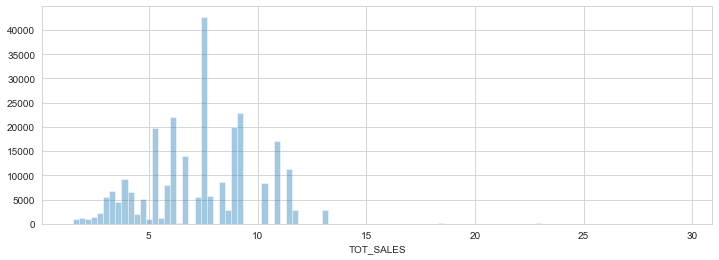

In [26]:
plt.figure(figsize=(12,4))
sns.distplot(transaction['TOT_SALES'],bins = 100, kde=False)

Most of the transaction have a total sales between 5 - 10 dollars 

Now the transaction data and purchase data have been cleaned, we now merge them together to one dataframe

In [27]:
transaction

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8
...,...,...,...,...,...,...,...,...
264831,43533,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8
264832,43325,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4
264833,43410,272,272379,270187,51,Doritos Mexicana 170g,2,8.8
264834,43461,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8


In [28]:
purchase

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream
...,...,...,...
72632,2370651,MIDAGE SINGLES/COUPLES,Mainstream
72633,2370701,YOUNG FAMILIES,Mainstream
72634,2370751,YOUNG FAMILIES,Premium
72635,2370961,OLDER FAMILIES,Budget


I'll map the purchase data to transaction data using the LYLTY_CARD_NUMBER

In [29]:
dict_lifestage = purchase.set_index('LYLTY_CARD_NBR')['LIFESTAGE']
dict_lifestage = dict(dict_lifestage)
dict_lifestage

{1000: 'YOUNG SINGLES/COUPLES',
 1002: 'YOUNG SINGLES/COUPLES',
 1003: 'YOUNG FAMILIES',
 1004: 'OLDER SINGLES/COUPLES',
 1005: 'MIDAGE SINGLES/COUPLES',
 1007: 'YOUNG SINGLES/COUPLES',
 1009: 'NEW FAMILIES',
 1010: 'YOUNG SINGLES/COUPLES',
 1011: 'OLDER SINGLES/COUPLES',
 1012: 'OLDER FAMILIES',
 1013: 'RETIREES',
 1016: 'OLDER FAMILIES',
 1018: 'YOUNG SINGLES/COUPLES',
 1019: 'OLDER SINGLES/COUPLES',
 1020: 'YOUNG SINGLES/COUPLES',
 1022: 'OLDER FAMILIES',
 1023: 'MIDAGE SINGLES/COUPLES',
 1024: 'YOUNG SINGLES/COUPLES',
 1025: 'YOUNG FAMILIES',
 1026: 'MIDAGE SINGLES/COUPLES',
 1027: 'OLDER FAMILIES',
 1028: 'YOUNG SINGLES/COUPLES',
 1030: 'RETIREES',
 1034: 'RETIREES',
 1038: 'OLDER FAMILIES',
 1039: 'YOUNG FAMILIES',
 1042: 'YOUNG SINGLES/COUPLES',
 1043: 'YOUNG FAMILIES',
 1044: 'YOUNG FAMILIES',
 1046: 'YOUNG SINGLES/COUPLES',
 1048: 'OLDER FAMILIES',
 1050: 'YOUNG FAMILIES',
 1051: 'YOUNG SINGLES/COUPLES',
 1052: 'MIDAGE SINGLES/COUPLES',
 1053: 'MIDAGE SINGLES/COUPLES',
 1054: 

In [30]:
transaction['LIFESTAGE'] = transaction['LYLTY_CARD_NBR'].map(dict_lifestage)

In [31]:
dict_pcustomer = purchase.set_index('LYLTY_CARD_NBR')['PREMIUM_CUSTOMER']
dict_pcustomer = dict(dict_pcustomer)
dict_pcustomer

{1000: 'Premium',
 1002: 'Mainstream',
 1003: 'Budget',
 1004: 'Mainstream',
 1005: 'Mainstream',
 1007: 'Budget',
 1009: 'Premium',
 1010: 'Mainstream',
 1011: 'Mainstream',
 1012: 'Mainstream',
 1013: 'Budget',
 1016: 'Mainstream',
 1018: 'Mainstream',
 1019: 'Premium',
 1020: 'Mainstream',
 1022: 'Budget',
 1023: 'Premium',
 1024: 'Premium',
 1025: 'Budget',
 1026: 'Premium',
 1027: 'Premium',
 1028: 'Budget',
 1030: 'Mainstream',
 1034: 'Premium',
 1038: 'Mainstream',
 1039: 'Mainstream',
 1042: 'Premium',
 1043: 'Budget',
 1044: 'Mainstream',
 1046: 'Budget',
 1048: 'Mainstream',
 1050: 'Budget',
 1051: 'Budget',
 1052: 'Budget',
 1053: 'Mainstream',
 1054: 'Mainstream',
 1055: 'Mainstream',
 1056: 'Mainstream',
 1057: 'Mainstream',
 1060: 'Mainstream',
 1061: 'Budget',
 1062: 'Premium',
 1064: 'Budget',
 1065: 'Premium',
 1067: 'Mainstream',
 1068: 'Premium',
 1071: 'Mainstream',
 1072: 'Premium',
 1074: 'Budget',
 1076: 'Budget',
 1077: 'Premium',
 1080: 'Budget',
 1081: 'Budget

In [32]:
transaction['PREMIUM_CUSTOMER'] = transaction['LYLTY_CARD_NBR'].map(dict_pcustomer)

Now we have a single data frame

In [33]:
transaction

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,YOUNG SINGLES/COUPLES,Premium
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,MIDAGE SINGLES/COUPLES,Budget
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,MIDAGE SINGLES/COUPLES,Budget
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,MIDAGE SINGLES/COUPLES,Budget
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,MIDAGE SINGLES/COUPLES,Budget
...,...,...,...,...,...,...,...,...,...,...
264831,43533,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8,YOUNG SINGLES/COUPLES,Premium
264832,43325,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4,YOUNG SINGLES/COUPLES,Premium
264833,43410,272,272379,270187,51,Doritos Mexicana 170g,2,8.8,YOUNG SINGLES/COUPLES,Premium
264834,43461,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8,YOUNG SINGLES/COUPLES,Premium


In [34]:
transaction['TXN_ID'].nunique()

263125

In [35]:
transaction = transaction.drop_duplicates() #Dropping any duplicates

In [36]:
transaction

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,YOUNG SINGLES/COUPLES,Premium
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,MIDAGE SINGLES/COUPLES,Budget
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,MIDAGE SINGLES/COUPLES,Budget
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,MIDAGE SINGLES/COUPLES,Budget
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,MIDAGE SINGLES/COUPLES,Budget
...,...,...,...,...,...,...,...,...,...,...
264831,43533,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8,YOUNG SINGLES/COUPLES,Premium
264832,43325,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4,YOUNG SINGLES/COUPLES,Premium
264833,43410,272,272379,270187,51,Doritos Mexicana 170g,2,8.8,YOUNG SINGLES/COUPLES,Premium
264834,43461,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8,YOUNG SINGLES/COUPLES,Premium


In [116]:
transaction.to_csv('Transaction2.csv', index = False) #saving the new dateframe 

In [37]:
transaction = pd.read_csv('Transaction2.csv')

We can see that the date column is in an integer format. Let's change this to a
date format. A quick search online tells us that CSV and Excel integer dates begin on 30
Dec 1899

In [38]:
from datetime import datetime

In [151]:
transaction['DATE2'] = pd.to_datetime(transaction['DATE'], origin = '1899-12-30', unit = 'D') 
#used DATE2 just incase it did not go as planned

C:\Users\EBUKAO~1\AppData\Local\Temp/ipykernel_11064/205120719.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transaction['DATE2'] = pd.to_datetime(transaction['DATE'], origin = '1899-12-30', unit = 'D')


In [152]:
transaction # You can see the converted date in DATE2

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER,DATE2
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,YOUNG SINGLES/COUPLES,Premium,2018-10-17
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,MIDAGE SINGLES/COUPLES,Budget,2019-05-14
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,MIDAGE SINGLES/COUPLES,Budget,2019-05-20
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,MIDAGE SINGLES/COUPLES,Budget,2018-08-17
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,MIDAGE SINGLES/COUPLES,Budget,2018-08-18
...,...,...,...,...,...,...,...,...,...,...,...
264831,43533,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8,YOUNG SINGLES/COUPLES,Premium,2019-03-09
264832,43325,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4,YOUNG SINGLES/COUPLES,Premium,2018-08-13
264833,43410,272,272379,270187,51,Doritos Mexicana 170g,2,8.8,YOUNG SINGLES/COUPLES,Premium,2018-11-06
264834,43461,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8,YOUNG SINGLES/COUPLES,Premium,2018-12-27


Lets see what months perform best

In [153]:
transaction['DATE'] = transaction['DATE2'].apply(lambda x : x.strftime('%Y-%m'))

C:\Users\EBUKAO~1\AppData\Local\Temp/ipykernel_11064/2967136811.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transaction['DATE'] = transaction['DATE2'].apply(lambda x : x.strftime('%Y-%m'))


In [40]:
top_sales_month = transaction.groupby('DATE')['TOT_SALES'].sum()

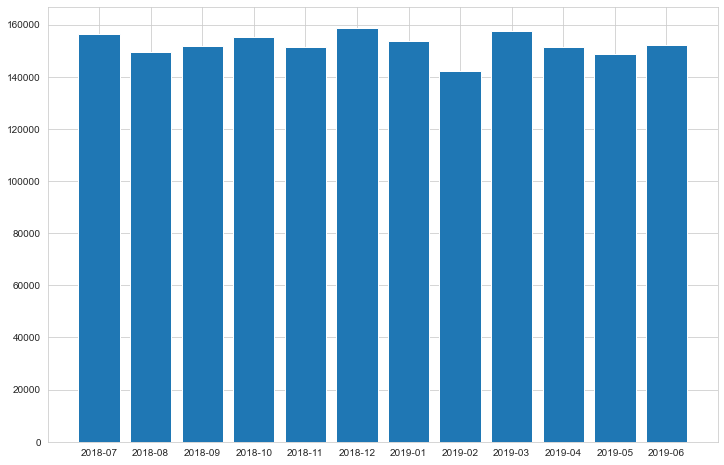

In [41]:
plt.figure(figsize=(12,8))
plt.bar(top_sales_month.index, top_sales_month.values)
plt.show()

As you can see, the data is a one year transaction data spanning from july 2018 - july 2019. Tho there isnt much difference between each month, but you can see sales is most in december. For obvious reasons i guess, holiday shopping

In [42]:
transaction.head(50)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER,DATE2,BRAND,SIZE
0,2018-10,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.00,YOUNG SINGLES/COUPLES,Premium,2018-10-17,natural,175
1,2019-05,1,1307,348,66,CCs Nacho Cheese 175g,3,6.30,MIDAGE SINGLES/COUPLES,Budget,2019-05-14,CCs,175
2,2019-05,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,5.80,MIDAGE SINGLES/COUPLES,Budget,2019-05-20,smiths,170
3,2018-08,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.00,MIDAGE SINGLES/COUPLES,Budget,2018-08-17,smiths,175
4,2018-08,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.80,MIDAGE SINGLES/COUPLES,Budget,2018-08-18,kettle,150
5,2019-05,4,4149,3333,16,Smiths Crinkle Chips Salt & Vinegar 330g,1,5.70,MIDAGE SINGLES/COUPLES,Budget,2019-05-16,smiths,330
6,2019-05,4,4196,3539,24,Grain Waves Sweet Chilli 210g,1,3.60,MIDAGE SINGLES/COUPLES,Budget,2019-05-16,grain,210
7,2018-08,5,5026,4525,42,Doritos Corn Chip Mexican Jalapeno 150g,1,3.90,MIDAGE SINGLES/COUPLES,Budget,2018-08-20,doritos,150
8,2018-08,7,7150,6900,52,Grain Waves Sour Cream&Chives 210G,2,7.20,MIDAGE SINGLES/COUPLES,Budget,2018-08-18,grain,210
9,2019-05,7,7215,7176,16,Smiths Crinkle Chips Salt & Vinegar 330g,1,5.70,MIDAGE SINGLES/COUPLES,Budget,2019-05-17,smiths,330


Now what i want to do is to look into the PROD_NAME column and see what i can extract from it. 

I want to try to extract the brand name of each product.   
Also want to extract the size of each product  

In [43]:
transaction['BRAND'] = transaction['PROD_NAME'].apply(lambda x:x.lower().split()[0])
#i have created a column to show the first word of each product since most of their names start with the name of the brand

In [44]:
transaction['BRAND'].unique()

array(['natural', 'ccs', 'smiths', 'kettle', 'grain', 'doritos',
       'twisties', 'ww', 'thins', 'burger', 'ncc', 'cheezels', 'infzns',
       'red', 'pringles', 'dorito', 'infuzions', 'smith', 'grnwves',
       'tyrrells', 'cobs', 'woolworths', 'french', 'rrd', 'tostitos',
       'cheetos', 'snbts', 'sunbites'], dtype=object)

Above are the given chip brands. But it still needs cleaning as some are repeated but written in different forms. i would have to replace them with the same label.

ncc and natural are same thing.  
grnwves is grain waves.  
I would replace grain and grnwves,ncc,infzns,dorito,smith,snbts with grainwaves,natural,infuzions,doritos,smiths,sunbites respectively


In [45]:
transaction['BRAND'] = transaction['BRAND'].replace(['ww','ccs','grnwves','ncc','infzns','dorito','smith','snbts'],['WW',
                                                'CCs','grain','natural','infuzions','doritos','smiths','sunbites'])

In [46]:
transaction['BRAND'].unique() #this is better

array(['natural', 'CCs', 'smiths', 'kettle', 'grain', 'doritos',
       'twisties', 'WW', 'thins', 'burger', 'cheezels', 'infuzions',
       'red', 'pringles', 'tyrrells', 'cobs', 'woolworths', 'french',
       'rrd', 'tostitos', 'cheetos', 'sunbites'], dtype=object)

Now i noticed not all the products are chips. Now seeing the instruction was an analysis in the chips sales, we would have to filter out any product that is not chips. For example the 'Old El Paso Salsa Dip Tomato Mild 300g' brand is a sauce and anything connected to the brand. so i would be filtering it out

In [47]:
transaction = transaction[transaction['BRAND']!='old']

In [48]:
transaction

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER,DATE2,BRAND,SIZE
0,2018-10,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,YOUNG SINGLES/COUPLES,Premium,2018-10-17,natural,175
1,2019-05,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,MIDAGE SINGLES/COUPLES,Budget,2019-05-14,CCs,175
2,2019-05,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,5.8,MIDAGE SINGLES/COUPLES,Budget,2019-05-20,smiths,170
3,2018-08,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,MIDAGE SINGLES/COUPLES,Budget,2018-08-17,smiths,175
4,2018-08,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,MIDAGE SINGLES/COUPLES,Budget,2018-08-18,kettle,150
...,...,...,...,...,...,...,...,...,...,...,...,...,...
255504,2019-03,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8,YOUNG SINGLES/COUPLES,Premium,2019-03-09,kettle,175
255505,2018-08,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4,YOUNG SINGLES/COUPLES,Premium,2018-08-13,tostitos,175
255506,2018-11,272,272379,270187,51,Doritos Mexicana 170g,2,8.8,YOUNG SINGLES/COUPLES,Premium,2018-11-06,doritos,170
255507,2018-12,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8,YOUNG SINGLES/COUPLES,Premium,2018-12-27,doritos,150


Now i would be extracting the size of each product

In [49]:
def size(text): 
    y = ''.join(text)
    return y[-4:-1] #since the size of the each product is the last thing writen in the name, i can use indexing to extract it


In [50]:
transaction['SIZE'] = transaction['PROD_NAME'].apply(size)

In [51]:
transaction

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER,DATE2,BRAND,SIZE
0,2018-10,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,YOUNG SINGLES/COUPLES,Premium,2018-10-17,natural,175
1,2019-05,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,MIDAGE SINGLES/COUPLES,Budget,2019-05-14,CCs,175
2,2019-05,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,5.8,MIDAGE SINGLES/COUPLES,Budget,2019-05-20,smiths,170
3,2018-08,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,MIDAGE SINGLES/COUPLES,Budget,2018-08-17,smiths,175
4,2018-08,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,MIDAGE SINGLES/COUPLES,Budget,2018-08-18,kettle,150
...,...,...,...,...,...,...,...,...,...,...,...,...,...
255504,2019-03,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8,YOUNG SINGLES/COUPLES,Premium,2019-03-09,kettle,175
255505,2018-08,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4,YOUNG SINGLES/COUPLES,Premium,2018-08-13,tostitos,175
255506,2018-11,272,272379,270187,51,Doritos Mexicana 170g,2,8.8,YOUNG SINGLES/COUPLES,Premium,2018-11-06,doritos,170
255507,2018-12,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8,YOUNG SINGLES/COUPLES,Premium,2018-12-27,doritos,150


In [52]:
transaction['SIZE'].unique() #these are the unique sizes of the products. But lets check out that 'Sal'

array(['175', '170', '150', '330', '210', '270', '220', '125', '110',
       '134', '380', '180', '165', '300', 'Sal', '250', '200', '160',
       '190', ' 90', ' 70'], dtype=object)

In [53]:
transaction[transaction['SIZE']== 'Sal'].PROD_NAME.unique()

array(['Kettle 135g Swt Pot Sea Salt'], dtype=object)

The size of the product above was not extracted because the size is not at the end like the rest. But since its the only one of its kind, i can easily replace Sal with its size 135

In [54]:
transaction['SIZE'] = transaction['SIZE'].replace(['Sal',' 90',' 70'],['135','90','70'])

From the chart below, it seems like people prefer the middle sized packaging(175,150), rather than the bigger ones(200,250) or smaller ones(70.90)

<AxesSubplot:xlabel='SIZE', ylabel='count'>

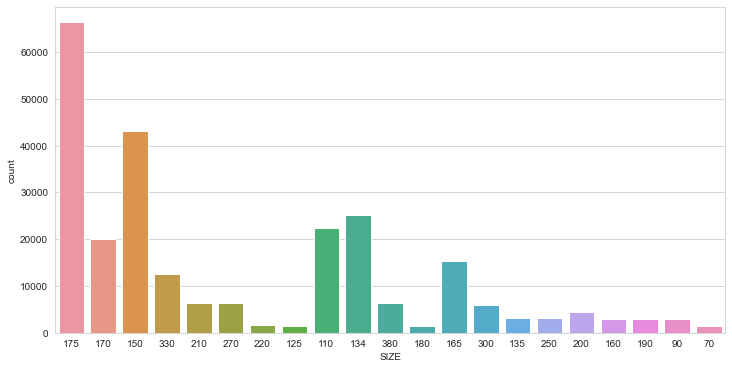

In [55]:
plt.figure(figsize=(12,6))
sns.countplot(data = transaction, x = 'SIZE')

In [56]:
transaction['BRAND'] = transaction['BRAND'].replace(['red'],['rrd']) #forgot to replace this when cleaning up the brand names

In [57]:
transaction.reset_index(drop = True, inplace = True)

In [58]:
transaction

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER,DATE2,BRAND,SIZE
0,2018-10,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,YOUNG SINGLES/COUPLES,Premium,2018-10-17,natural,175
1,2019-05,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,MIDAGE SINGLES/COUPLES,Budget,2019-05-14,CCs,175
2,2019-05,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,5.8,MIDAGE SINGLES/COUPLES,Budget,2019-05-20,smiths,170
3,2018-08,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,MIDAGE SINGLES/COUPLES,Budget,2018-08-17,smiths,175
4,2018-08,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,MIDAGE SINGLES/COUPLES,Budget,2018-08-18,kettle,150
...,...,...,...,...,...,...,...,...,...,...,...,...,...
255504,2019-03,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8,YOUNG SINGLES/COUPLES,Premium,2019-03-09,kettle,175
255505,2018-08,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4,YOUNG SINGLES/COUPLES,Premium,2018-08-13,tostitos,175
255506,2018-11,272,272379,270187,51,Doritos Mexicana 170g,2,8.8,YOUNG SINGLES/COUPLES,Premium,2018-11-06,doritos,170
255507,2018-12,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8,YOUNG SINGLES/COUPLES,Premium,2018-12-27,doritos,150


Saving the new and adjusted dataframe

In [59]:
transaction.to_csv('Transaction2.csv', index = False)

In [59]:
transaction = pd.read_csv('Transaction2.csv')
transaction

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER,DATE2,BRAND,SIZE
0,2018-10,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,YOUNG SINGLES/COUPLES,Premium,2018-10-17,natural,175
1,2019-05,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,MIDAGE SINGLES/COUPLES,Budget,2019-05-14,CCs,175
2,2019-05,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,5.8,MIDAGE SINGLES/COUPLES,Budget,2019-05-20,smiths,170
3,2018-08,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,MIDAGE SINGLES/COUPLES,Budget,2018-08-17,smiths,175
4,2018-08,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,MIDAGE SINGLES/COUPLES,Budget,2018-08-18,kettle,150
...,...,...,...,...,...,...,...,...,...,...,...,...,...
255504,2019-03,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8,YOUNG SINGLES/COUPLES,Premium,2019-03-09,kettle,175
255505,2018-08,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4,YOUNG SINGLES/COUPLES,Premium,2018-08-13,tostitos,175
255506,2018-11,272,272379,270187,51,Doritos Mexicana 170g,2,8.8,YOUNG SINGLES/COUPLES,Premium,2018-11-06,doritos,170
255507,2018-12,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8,YOUNG SINGLES/COUPLES,Premium,2018-12-27,doritos,150


Before i go into the analysis properly, i want to create another column where i can see the price of each product, this way i can tell what segment buys the expensive chips and the cheap ones. Getting the price of each product would simply be the division of the tot_sales by the prod_qty

In [60]:
transaction['PROD_PRICE'] = transaction['TOT_SALES']/transaction['PROD_QTY']

For easier analysis i would change some of these columns to strings, as they have to be treated as categorical features rather than intergers

In [62]:
transaction[['STORE_NBR','LYLTY_CARD_NBR','TXN_ID','PROD_NBR','SIZE']] = transaction[['STORE_NBR','LYLTY_CARD_NBR',
                                                                                      'TXN_ID','PROD_NBR','SIZE']].astype(str)

In [63]:
transaction['PROD_NAME'].nunique()

111

Now for a proper analysis on the transaction and finding out what sectors push sales of chips

Now for each category, you would see where i label a chart, top 10 of that category in both tot sales and then in number of transaction. this is to say that a product could have a higher tot sales because its more expensive, but might not be the most sought after product.

In [64]:
top_10_stores_tot_sales = transaction.groupby('STORE_NBR')['TOT_SALES'].sum().sort_values(ascending = False).head(10)

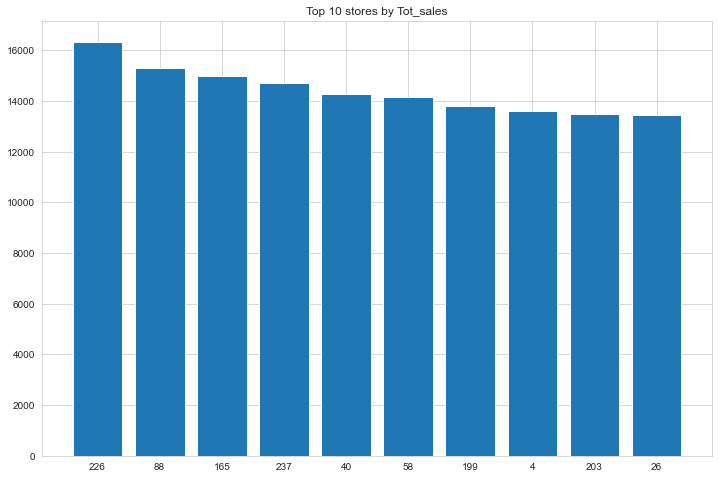

In [65]:
plt.figure(figsize=(12,8))
plt.title('Top 10 stores by Tot_sales')
plt.bar(top_10_stores_tot_sales.index, top_10_stores_tot_sales.values)
plt.show()

we can see the stores that brought in the most sales

In [66]:
top_10_stores_tot_txn = transaction.groupby('STORE_NBR')['TXN_ID'].count().sort_values(ascending = False).head(10)

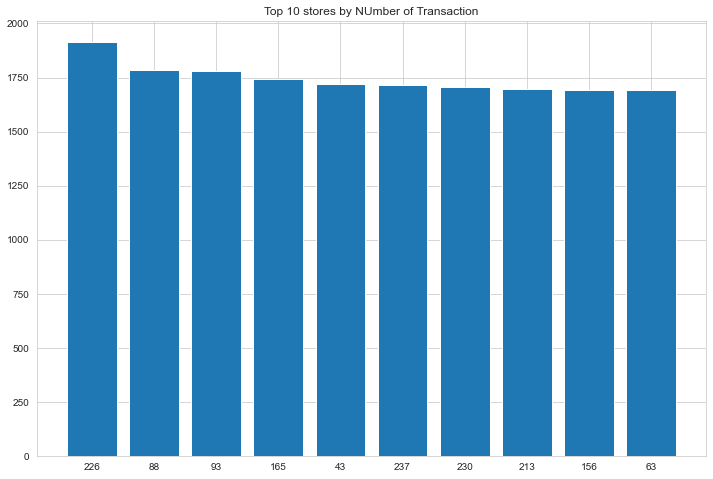

In [67]:
plt.figure(figsize=(12,8))
plt.title('Top 10 stores by NUmber of Transaction')
plt.bar(top_10_stores_tot_txn.index, top_10_stores_tot_txn.values)
plt.show()

it can be seen that store 226 has the highest sales and transaction. where as we have stores like store 40,4,58,199,203 amd 26 which is practically most of the top stores by sales not featuring in top stores by transaction, meaning the ones appearing in tot sales are most likely the ones that sell expensive products.

In [68]:
top_10_prod_sales = transaction.groupby('PROD_NAME')['TOT_SALES'].sum().sort_values(ascending = False).head(10)

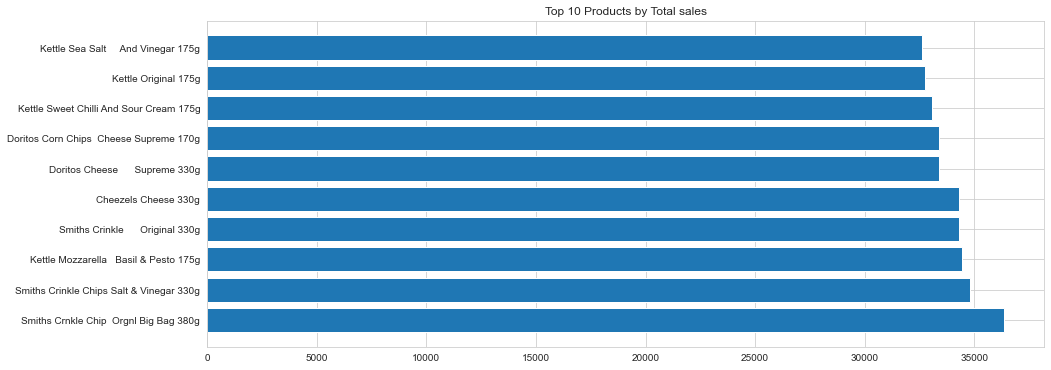

In [69]:
plt.figure(figsize=(15,6))
plt.title('Top 10 Products by Total sales')
plt.barh(top_10_prod_sales.index, top_10_prod_sales.values)
plt.show()

In [70]:
top_10_prod_txn = transaction.groupby('PROD_NAME')['PROD_QTY'].sum().sort_values(ascending = False).head(10)

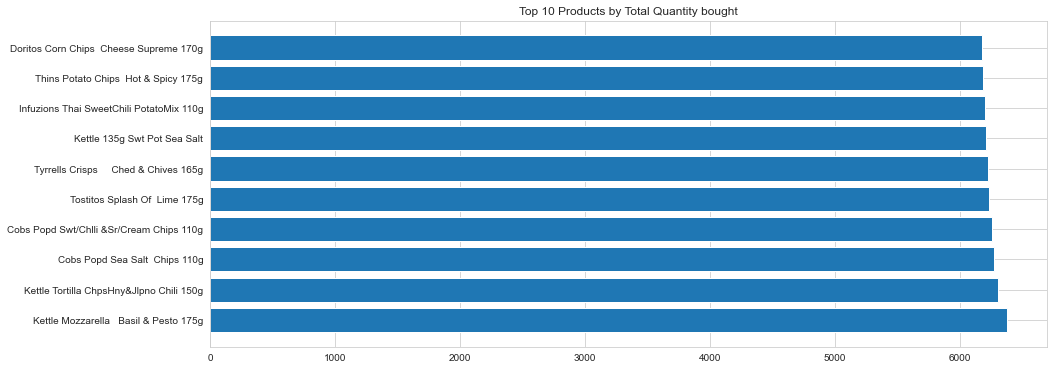

In [71]:
plt.figure(figsize=(15,6))
plt.title('Top 10 Products by Total Quantity bought')
plt.barh(top_10_prod_txn.index, top_10_prod_txn.values)
plt.show()

In [72]:
top_10_brands_sales = transaction.groupby('BRAND')['TOT_SALES'].sum().sort_values(ascending = False).head(10)

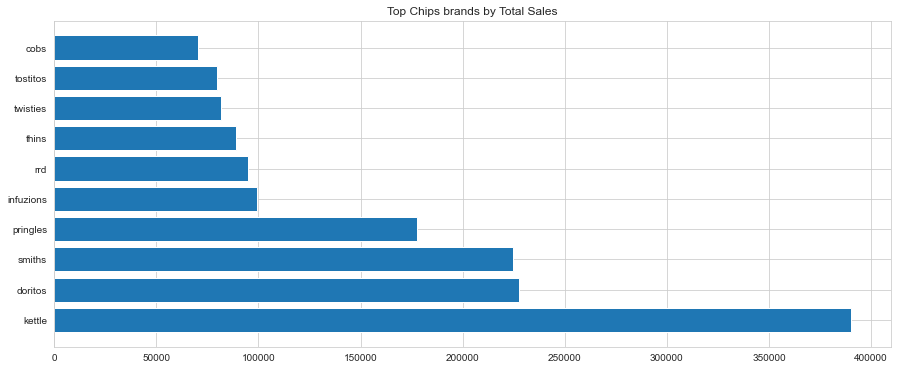

In [73]:
plt.figure(figsize=(15,6))
plt.title('Top Chips brands by Total Sales')
plt.barh(top_10_brands_sales.index, top_10_brands_sales.values)
plt.show()

In [74]:
top_10_brands_txn = transaction.groupby('BRAND')['PROD_QTY'].sum().sort_values(ascending = False).head(10)

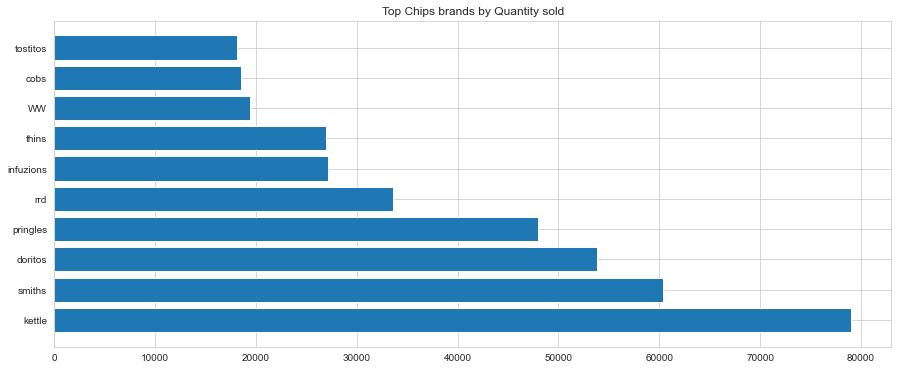

In [75]:
plt.figure(figsize=(15,6))
plt.title('Top Chips brands by Quantity sold')
plt.barh(top_10_brands_txn.index, top_10_brands_txn.values)
plt.show()

In [98]:
top_expensive_brands = transaction.groupby('BRAND')['PROD_PRICE'].mean().sort_values(ascending=False)

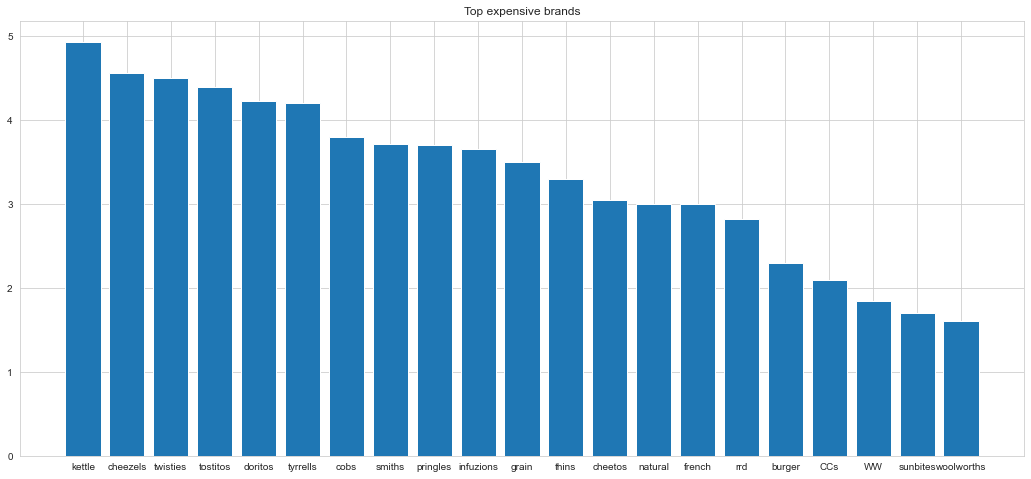

In [102]:
plt.figure(figsize=(18,8))
plt.title('Top expensive brands')
plt.bar(top_expensive_brands.index, top_expensive_brands.values)
plt.show()

Having plotted charts showing key details and movers of sales, i would be creating a table that would summarize the entire transaction according to customer segment

I would start by creating a table that shows what each customer segment consumes across each brand

In [76]:
transaction['COUNT'] = 1

In [77]:
brand_consumption = transaction.pivot_table(index=['PREMIUM_CUSTOMER','LIFESTAGE'],columns = 'BRAND', values = 'COUNT', 
                                    aggfunc = 'sum', fill_value=0)

<AxesSubplot:xlabel='BRAND', ylabel='PREMIUM_CUSTOMER-LIFESTAGE'>

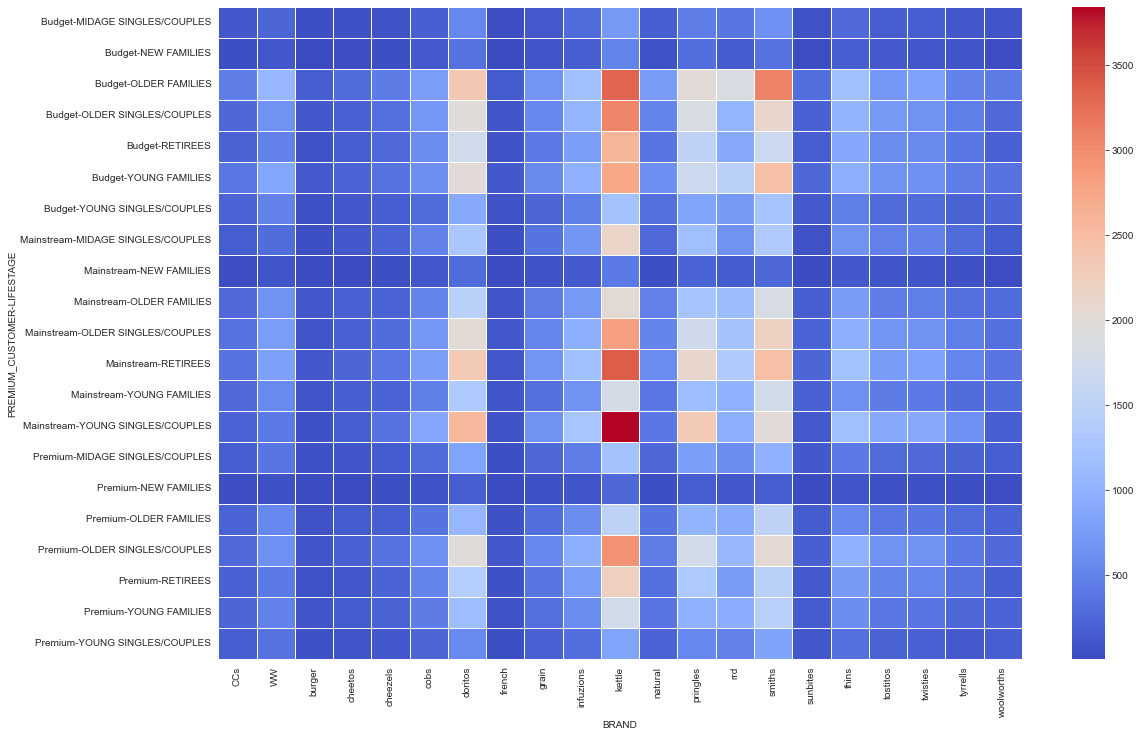

In [78]:
plt.figure(figsize=(18,12))
sns.heatmap(brand_consumption,cmap='coolwarm',linecolor='white',linewidths=1)

From the plot above, we can see the customer segments and what brand they purchase with Kettle, doritos and Smiths taking the lead. Also you can see that Mainstream young single/couples go for quality/expensive chips Kettle. And for whatever reason, in as much as twisties and cheezels are also quite expensive, they aren't bought much

Next i would create a table that shows each customer segment with their count in each segment,product quantity bought, total sales and number of transactions made

In [103]:
customer_counts = transaction.groupby(['PREMIUM_CUSTOMER','LIFESTAGE'])['LYLTY_CARD_NBR'].nunique().reset_index()
#this gives the number of persons in each segment using their unique card number

In [104]:
customer_counts.columns = ['PREMIUM_CUSTOMER','LIFESTAGE','CUSTOMER_COUNT'] 

In [105]:
customer_counts

,PREMIUM_CUSTOMER,LIFESTAGE,CUSTOMER_COUNT
0,Budget,MIDAGE SINGLES/COUPLES,1497
1,Budget,NEW FAMILIES,1100
2,Budget,OLDER FAMILIES,4641
3,Budget,OLDER SINGLES/COUPLES,4892
4,Budget,RETIREES,4419
5,Budget,YOUNG FAMILIES,3980
6,Budget,YOUNG SINGLES/COUPLES,3735
7,Mainstream,MIDAGE SINGLES/COUPLES,3308
8,Mainstream,NEW FAMILIES,840
9,Mainstream,OLDER FAMILIES,2808


In [106]:
y = (transaction.pivot_table(index=['PREMIUM_CUSTOMER','LIFESTAGE'], 
                             values = ['TOT_SALES','PROD_QTY'], aggfunc = np.sum)).reset_index()
y   #This shows each customer segment with their total sales and product qty

,PREMIUM_CUSTOMER,LIFESTAGE,PROD_QTY,TOT_SALES
0,Budget,MIDAGE SINGLES/COUPLES,9223,33908.90
1,Budget,NEW FAMILIES,5369,20726.00
2,Budget,OLDER FAMILIES,43581,159809.10
3,Budget,OLDER SINGLES/COUPLES,33930,129301.55
4,Budget,RETIREES,27685,106920.20
5,Budget,YOUNG FAMILIES,35810,131864.15
6,Budget,YOUNG SINGLES/COUPLES,16162,58163.95
7,Mainstream,MIDAGE SINGLES/COUPLES,21743,85366.50
8,Mainstream,NEW FAMILIES,4161,16079.10
9,Mainstream,OLDER FAMILIES,26833,98050.20


Now to merge both tables

In [107]:
customer_counts['PROD_QTY'] = y['PROD_QTY']
customer_counts['TOT_SALES'] = y['TOT_SALES']
customer_segment_sales_data = customer_counts
customer_segment_sales_data

,PREMIUM_CUSTOMER,LIFESTAGE,CUSTOMER_COUNT,PROD_QTY,TOT_SALES
0,Budget,MIDAGE SINGLES/COUPLES,1497,9223,33908.90
1,Budget,NEW FAMILIES,1100,5369,20726.00
2,Budget,OLDER FAMILIES,4641,43581,159809.10
3,Budget,OLDER SINGLES/COUPLES,4892,33930,129301.55
4,Budget,RETIREES,4419,27685,106920.20
5,Budget,YOUNG FAMILIES,3980,35810,131864.15
6,Budget,YOUNG SINGLES/COUPLES,3735,16162,58163.95
7,Mainstream,MIDAGE SINGLES/COUPLES,3308,21743,85366.50
8,Mainstream,NEW FAMILIES,840,4161,16079.10
9,Mainstream,OLDER FAMILIES,2808,26833,98050.20


Let me add the number of transactions of each customer segment

In [108]:
no_of_transaction = transaction.groupby(['PREMIUM_CUSTOMER','LIFESTAGE'])['TXN_ID'].nunique().reset_index()

In [109]:
customer_segment_sales_data['TRANSACTIONS'] = no_of_transaction['TXN_ID']

In [110]:
customer_segment_sales_data

,PREMIUM_CUSTOMER,LIFESTAGE,CUSTOMER_COUNT,PROD_QTY,TOT_SALES,TRANSACTIONS
0,Budget,MIDAGE SINGLES/COUPLES,1497,9223,33908.90,4845
1,Budget,NEW FAMILIES,1100,5369,20726.00,2885
2,Budget,OLDER FAMILIES,4641,43581,159809.10,22191
3,Budget,OLDER SINGLES/COUPLES,4892,33930,129301.55,17636
4,Budget,RETIREES,4419,27685,106920.20,14551
5,Budget,YOUNG FAMILIES,3980,35810,131864.15,18308
6,Budget,YOUNG SINGLES/COUPLES,3735,16162,58163.95,8935
7,Mainstream,MIDAGE SINGLES/COUPLES,3308,21743,85366.50,11308
8,Mainstream,NEW FAMILIES,840,4161,16079.10,2239
9,Mainstream,OLDER FAMILIES,2808,26833,98050.20,13650


In [112]:
customer_segment_sales_data['TXN/CUSTOMER'] = customer_segment_sales_data['TRANSACTIONS']/customer_segment_sales_data['CUSTOMER_COUNT']

In [114]:
customer_segment_sales_data['CHIPS/CUSTOMER'] = customer_segment_sales_data['PROD_QTY']/customer_segment_sales_data['CUSTOMER_COUNT']

In [115]:
customer_segment_sales_data['AVG_PRICE/CHIP'] = customer_segment_sales_data['TOT_SALES']/customer_segment_sales_data['PROD_QTY']

In [116]:
customer_segment_sales_data['PURCHASE/CUSTOMER'] = customer_segment_sales_data['TOT_SALES']/customer_segment_sales_data['CUSTOMER_COUNT']

In [117]:
customer_segment_sales_data

,PREMIUM_CUSTOMER,LIFESTAGE,CUSTOMER_COUNT,PROD_QTY,TOT_SALES,TRANSACTIONS,TXN/CUSTOMER,CHIPS/CUSTOMER,AVG_PRICE/CHIP,PURCHASE/CUSTOMER
0,Budget,MIDAGE SINGLES/COUPLES,1497,9223,33908.90,4845,3.236473,6.160989,3.676559,22.651236
1,Budget,NEW FAMILIES,1100,5369,20726.00,2885,2.622727,4.880909,3.860309,18.841818
2,Budget,OLDER FAMILIES,4641,43581,159809.10,22191,4.781513,9.390433,3.666944,34.434195
3,Budget,OLDER SINGLES/COUPLES,4892,33930,129301.55,17636,3.605070,6.935814,3.810833,26.431224
4,Budget,RETIREES,4419,27685,106920.20,14551,3.292826,6.264992,3.862026,24.195565
5,Budget,YOUNG FAMILIES,3980,35810,131864.15,18308,4.600000,8.997487,3.682328,33.131696
6,Budget,YOUNG SINGLES/COUPLES,3735,16162,58163.95,8935,2.392236,4.327175,3.598809,15.572677
7,Mainstream,MIDAGE SINGLES/COUPLES,3308,21743,85366.50,11308,3.418380,6.572854,3.926160,25.806076
8,Mainstream,NEW FAMILIES,840,4161,16079.10,2239,2.665476,4.953571,3.864239,19.141786
9,Mainstream,OLDER FAMILIES,2808,26833,98050.20,13650,4.861111,9.555912,3.654090,34.918162


At this point PROD_QTY represents the total number of chips bought

TOT_SALES represents the total sales made.

CUSTOMER_COUNT represents the number of customers that purchased chips 

TRANSACTIONS represents the number of transactions made

TXN/CUSTOMER represents the number of transactions per customer

CHIPS/CUSTOMER represents the number of chips bought per customer

AVG_PRICE/CHIP represents the average price of each chip bought

PURCHASE/CUSTOMER represents the average cost of purchase of each customer

In [118]:
customer_segment_sales_data.sort_values(by='TOT_SALES', ascending = False)

,PREMIUM_CUSTOMER,LIFESTAGE,CUSTOMER_COUNT,PROD_QTY,TOT_SALES,TRANSACTIONS,TXN/CUSTOMER,CHIPS/CUSTOMER,AVG_PRICE/CHIP,PURCHASE/CUSTOMER
2,Budget,OLDER FAMILIES,4641,43581,159809.10,22191,4.781513,9.390433,3.666944,34.434195
13,Mainstream,YOUNG SINGLES/COUPLES,7955,37025,148251.95,19921,2.504211,4.654305,4.004104,18.636323
11,Mainstream,RETIREES,6421,39054,147232.65,20604,3.208846,6.082230,3.769976,22.929863
5,Budget,YOUNG FAMILIES,3980,35810,131864.15,18308,4.600000,8.997487,3.682328,33.131696
3,Budget,OLDER SINGLES/COUPLES,4892,33930,129301.55,17636,3.605070,6.935814,3.810833,26.431224
10,Mainstream,OLDER SINGLES/COUPLES,4894,33820,126406.35,17586,3.593380,6.910503,3.737621,25.828841
17,Premium,OLDER SINGLES/COUPLES,4715,32727,124919.55,17007,3.606999,6.941039,3.817018,26.494072
4,Budget,RETIREES,4419,27685,106920.20,14551,3.292826,6.264992,3.862026,24.195565
9,Mainstream,OLDER FAMILIES,2808,26833,98050.20,13650,4.861111,9.555912,3.654090,34.918162
18,Premium,RETIREES,3835,23931,91968.95,12532,3.267797,6.240156,3.843088,23.981473


From the table above, we can clearly see every detail we would need from the extremely large data set given. This breaks down the entire data into Customer segments and we can see how each behaves and can clearly see what segments are very crucial to the Chips industry. I believe the table ablove can answer any management question, especially regarding numbers. Let's visualize some of these

In [228]:
customer_segment_sales_data.to_csv('customer_segment_sales_data.csv', index = False)

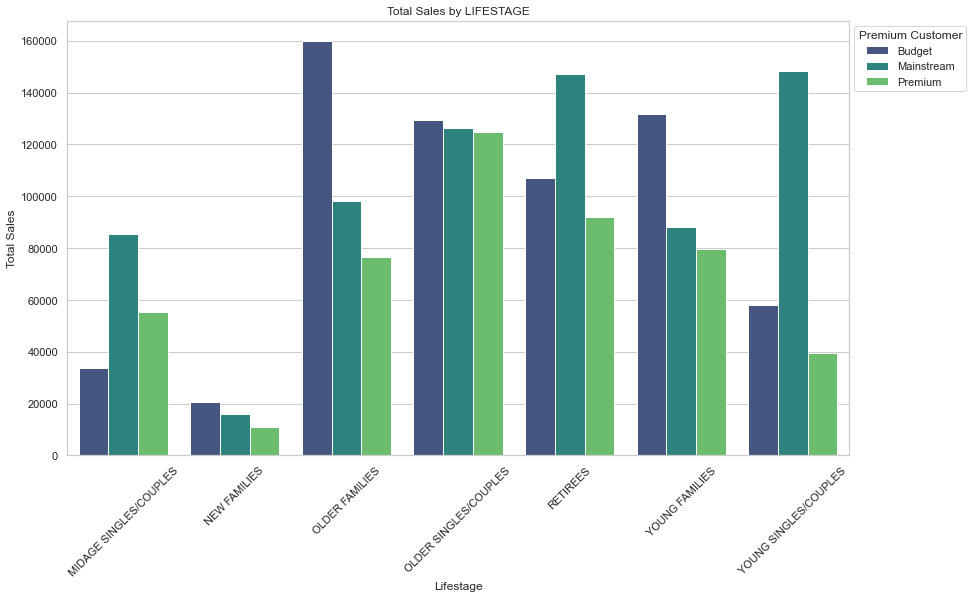

In [119]:
sns.set(style="whitegrid")

plt.figure(figsize=(14, 8))
sns.barplot(x='LIFESTAGE', y='TOT_SALES', hue='PREMIUM_CUSTOMER', data=customer_segment_sales_data, palette='viridis')
plt.title('Total Sales by LIFESTAGE')
plt.ylabel('Total Sales')
plt.xlabel('Lifestage')
plt.xticks(rotation=45)
plt.legend(title='Premium Customer', bbox_to_anchor=(1, 1), loc='upper left')
plt.show()

We can see from the chart above, the segment that brings in the most money is the Budget Older families, followed by Mainstream young single/couples and retirees.

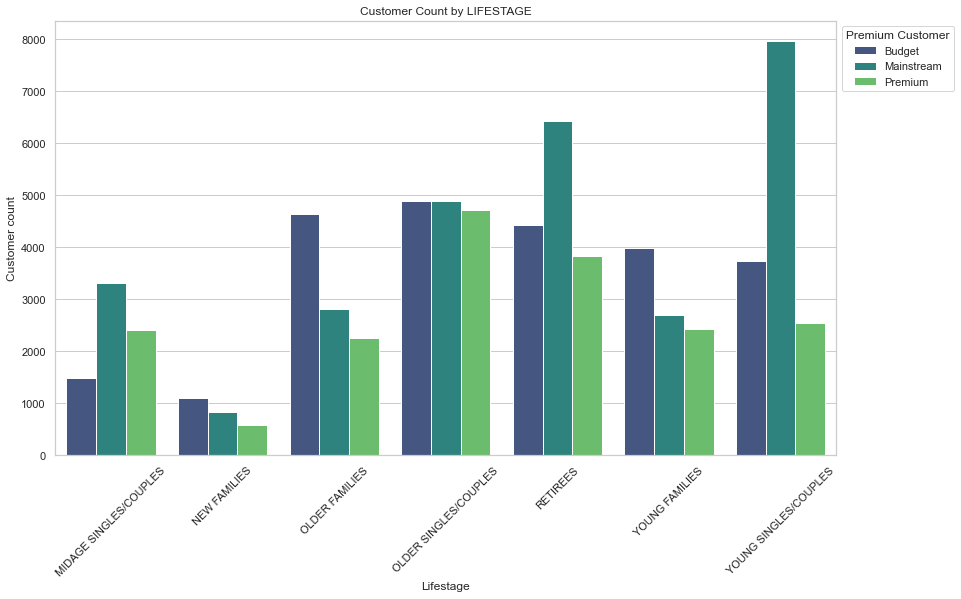

In [120]:
sns.set(style="whitegrid")

plt.figure(figsize=(14, 8))
sns.barplot(x='LIFESTAGE', y='CUSTOMER_COUNT', hue='PREMIUM_CUSTOMER', data=customer_segment_sales_data, palette='viridis')
plt.title('Customer Count by LIFESTAGE')
plt.ylabel('Customer count')
plt.xlabel('Lifestage')
plt.xticks(rotation=45)
plt.legend(title='Premium Customer', bbox_to_anchor=(1, 1), loc='upper left')
plt.show()

This plot above shows the customer count in each segment and this plays an important role in the next chart. if you compare this chat with the one above, you'll see that the segment with the top sales aren't even in the top 3 most populated, meaning they either bought a whole lot of chips per individual or they were simply buying the expensive ones.

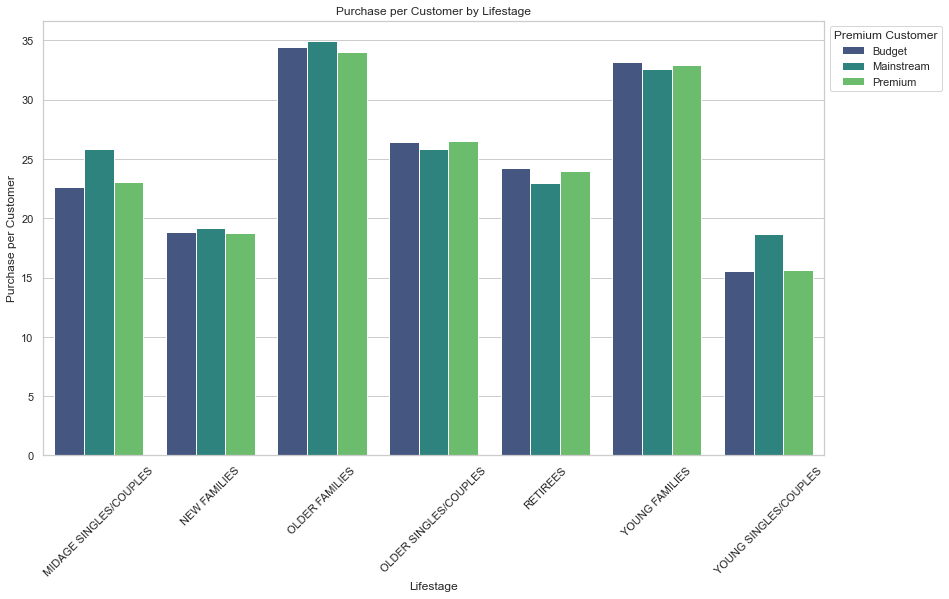

In [122]:
sns.set(style="whitegrid")

plt.figure(figsize=(14, 8))
sns.barplot(x='LIFESTAGE', y='PURCHASE/CUSTOMER', hue='PREMIUM_CUSTOMER', data=customer_segment_sales_data, palette='viridis')
plt.title('Purchase per Customer by Lifestage')
plt.ylabel('Purchase per Customer')
plt.xlabel('Lifestage')
plt.xticks(rotation=45)
plt.legend(title='Premium Customer', bbox_to_anchor=(1, 1), loc='upper left')
plt.show()

I think this is the most important metric of all. Here we can visualize the average purchase of each individual in each segment. Here we can easily deduce that Older and Younger families are the movers of the sales of chips. They each spend the most on purchase of chips. Other segments might get to the top sales due to high number of individuals in that segment or high number of purchases, we'll see about that. But these two segments spend the most on chips 

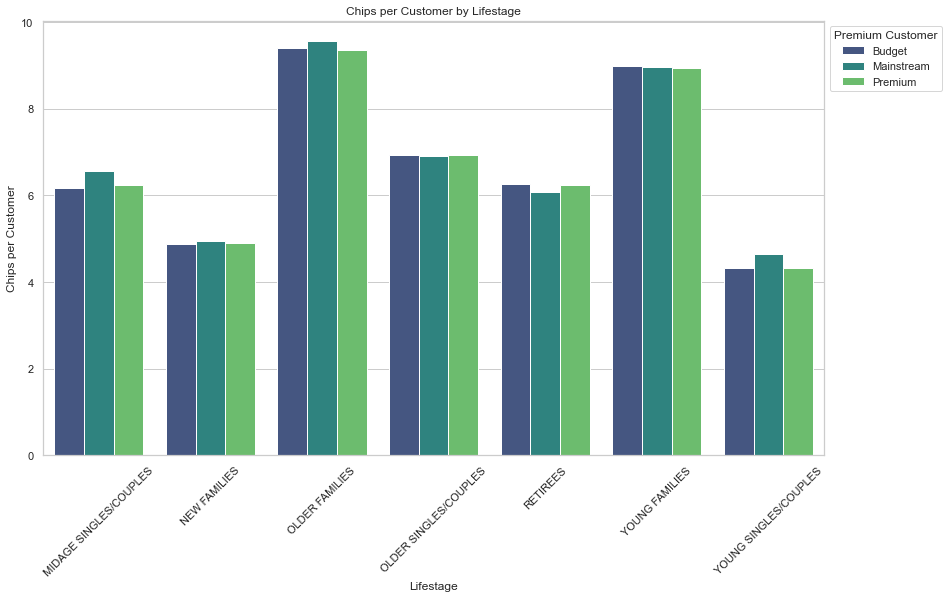

In [123]:
sns.set(style="whitegrid")

plt.figure(figsize=(14, 8))
sns.barplot(x='LIFESTAGE', y='CHIPS/CUSTOMER', hue='PREMIUM_CUSTOMER', data=customer_segment_sales_data, palette='viridis')
plt.title('Chips per Customer by Lifestage')
plt.ylabel('Chips per Customer')
plt.xlabel('Lifestage')
plt.xticks(rotation=45)
plt.legend(title='Premium Customer', bbox_to_anchor=(1, 1), loc='upper left')
plt.show()

Not only do the older and young families spend more on chips, they also buy more chips than any other segment

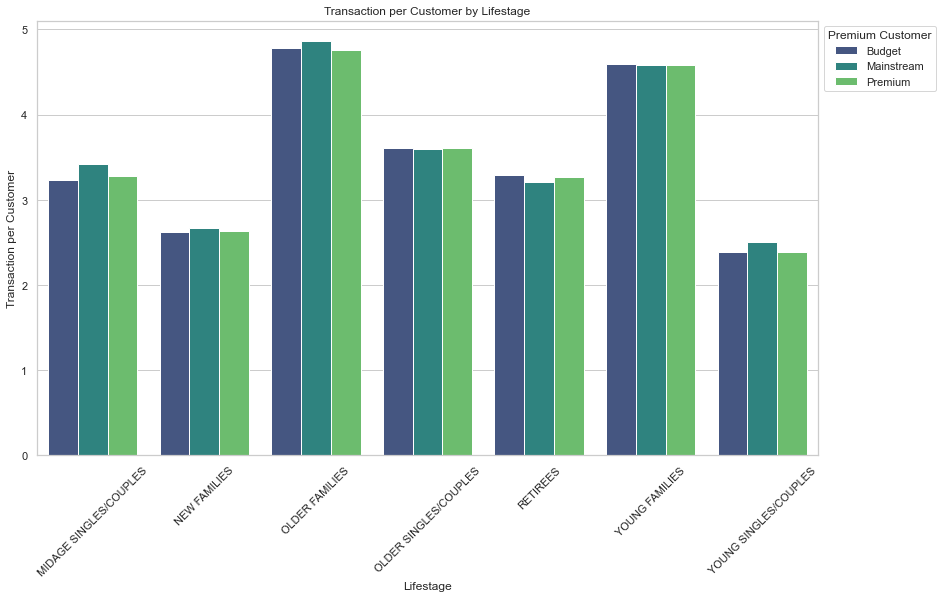

In [124]:
sns.set(style="whitegrid")

plt.figure(figsize=(14, 8))
sns.barplot(x='LIFESTAGE', y='TXN/CUSTOMER', hue='PREMIUM_CUSTOMER', data=customer_segment_sales_data, palette='viridis')
plt.title('Transaction per Customer by Lifestage')
plt.ylabel('Transaction per Customer')
plt.xlabel('Lifestage')
plt.xticks(rotation=45)
plt.legend(title='Premium Customer', bbox_to_anchor=(1, 1), loc='upper left')
plt.show()

Both segments also carry out more transactions than any other segment

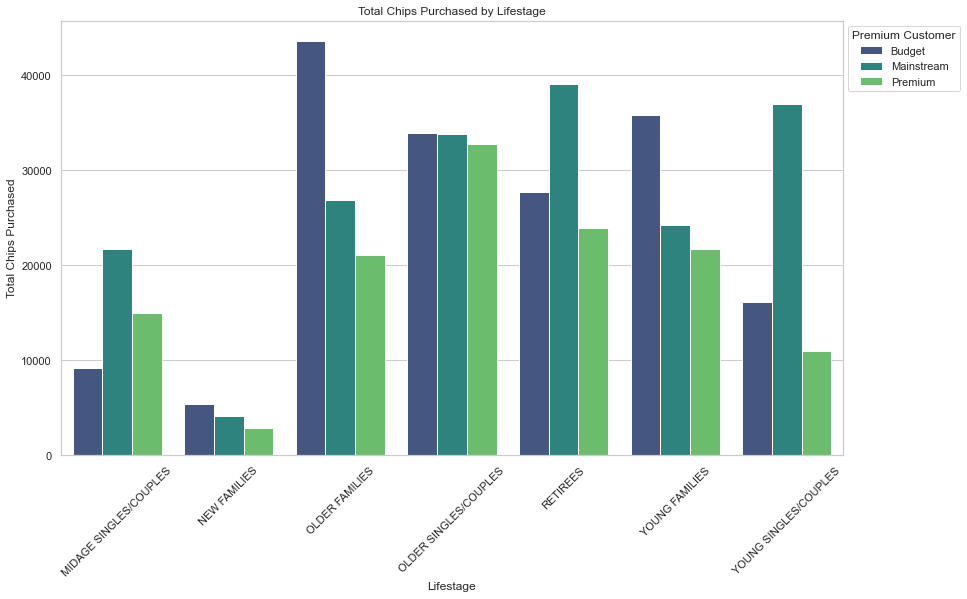

In [245]:
sns.set(style="whitegrid")

plt.figure(figsize=(14, 8))
sns.barplot(x='LIFESTAGE', y='PROD_QTY', hue='PREMIUM_CUSTOMER', data=customer_segment_sales_data, palette='viridis')
plt.title('Total Chips Purchased by Lifestage')
plt.ylabel('Total Chips Purchased')
plt.xlabel('Lifestage')
plt.xticks(rotation=45)
plt.legend(title='Premium Customer', bbox_to_anchor=(1, 1), loc='upper left')
plt.show()

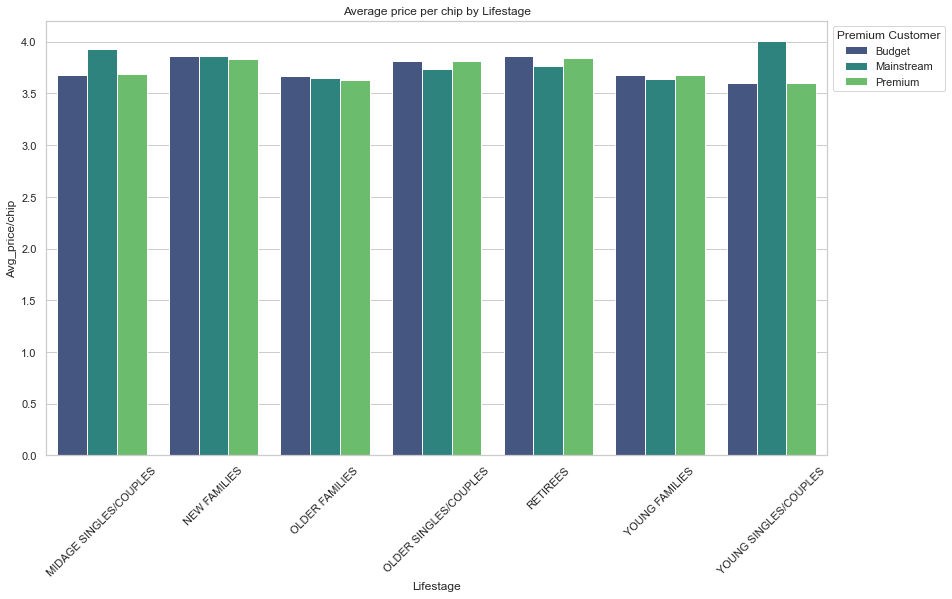

In [128]:
sns.set(style="whitegrid")

plt.figure(figsize=(14, 8))
sns.barplot(x='LIFESTAGE', y='AVG_PRICE/CHIP', hue='PREMIUM_CUSTOMER', data=customer_segment_sales_data, palette='viridis')
plt.title('Average price per chip by Lifestage')
plt.ylabel('Avg_price/chip')
plt.xlabel('Lifestage')
plt.xticks(rotation=45)
plt.legend(title='Premium Customer', bbox_to_anchor=(1, 1), loc='upper left')
plt.show()

There are alot of conclusions to be drawn from this analysis done. First it is clear that Budget older families really contribute so much to the chips market, they might not be so much in number but with their number they drive sales the most, each person buying alot.

Mainstream young single/couples are only in the top sales due to their large number in the segment, they don't buy as much as most other segments. They are also more likely to spend more on chips.

The Premium members of the older and younger families are also an essential part of this market. They are few in number but clearly they buy expensive chps and they buy alot of it, reason why their individual purchase is so high


